## Image Generation

### Titan Image Generation

In [5]:
import boto3
import json

bedrock_runtime = boto3.client(region_name='us-east-1', service_name='bedrock-runtime')

In [2]:
prompt = 'A picture of an apple on a table'

In [3]:
parameters = {'taskType': 'TEXT_IMAGE',
              'textToImageParams': {'text': prompt},
              'imageGenerationConfig': {'numberOfImages': 1,
                                        'quality': 'premium',
                                        'height': 512,
                                        'width': 512,
                                        'seed':0 }}

In [10]:
request_body = json.dumps(parameters)

In [11]:
response = bedrock_runtime.invoke_model(body=request_body,
                                        modelId='amazon.titan-image-generator-v1')

In [12]:
response_body = json.loads(response.get('body').read())

In [13]:
import base64
from PIL import Image

In [15]:
base64_image_data = base64.b64decode(response_body['images'][0])

In [16]:
file_path = 'new_apple.png'

with open(file_path, 'wb') as file:
    file.write(base64_image_data)

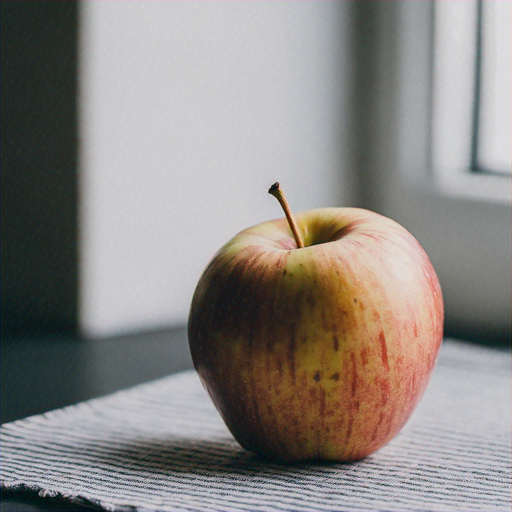

In [17]:
Image.open('new_apple.png')

In [23]:
with open('new_apple.png', 'rb') as f:
    content = f.read()
    image_string = base64.b64encode(content).decode('utf-8')

In [25]:
parameters = {
    'taskType': 'IMAGE_VARIATION',
    'imageVariationParams': {
        'text': 'A beautiful watercolor painting of an apple, heavy brushstrokes',
        'images': [image_string]
    },
    'imageGenerationConfig': {
        'numberOfImages': 1,
        'height': 512,
        'width': 512,
        'cfgScale': 9,
        'quality': 'premium'
    }
}

In [26]:
request_body = json.dumps(parameters)

In [27]:
response = bedrock_runtime.invoke_model(body=request_body, modelId='amazon.titan-image-generator-v1')
response_body = json.loads(response.get('body').read())
base64_image_data = base64.b64decode(response_body['images'][0])

In [28]:
file_path = 'watercolor_apple.png'

In [30]:
with open(file_path, 'wb') as file:
    file.write(base64_image_data)

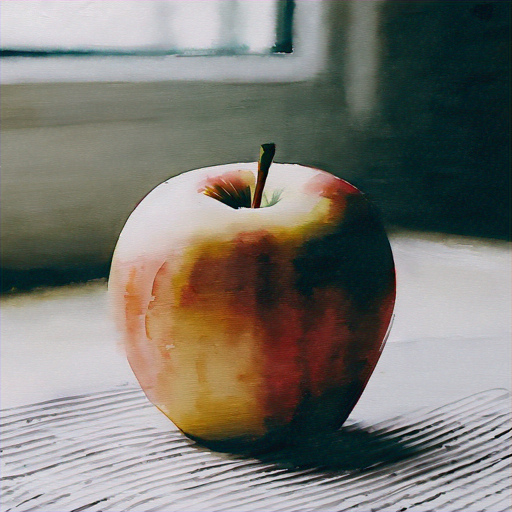

In [31]:
Image.open('watercolor_apple.png')